In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

Reading Superset data

In [2]:
final=pd.read_csv("../../../../data/stage_1/superset.csv")
final['Date']=final['Date'].astype('datetime64[ns]')

Texas weekly statistics

In [3]:
cases_texas=final[final['State']=='TX']

In [4]:
cases_texas['new cases']=cases_texas['Cases'].diff()
cases_texas['new deaths']=cases_texas['Deaths'].diff()

<ipython-input-4-7963e38d096a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_texas['new cases']=cases_texas['Cases'].diff()
<ipython-input-4-7963e38d096a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_texas['new deaths']=cases_texas['Deaths'].diff()


Dropped the first date as its value is NAN 

In [5]:

cases_texas=cases_texas[cases_texas['Date']!='2020-01-22']


Making negative values in new cases and new deaths as zero

In [6]:
cases_texas['new cases'][cases_texas['new cases']<0]=0
cases_texas['new deaths'][cases_texas['new deaths']<0]=0

In [7]:
cases_texas_filtered=cases_texas

In [8]:
weekly_stat=cases_texas_filtered.groupby([pd.Grouper(key='Date',freq='1w')])['new cases','new deaths'].agg({'new cases':'sum','new deaths':'sum'}).reset_index().round(decimals=0)

<ipython-input-8-83d5a54c79e9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_stat=cases_texas_filtered.groupby([pd.Grouper(key='Date',freq='1w')])['new cases','new deaths'].agg({'new cases':'sum','new deaths':'sum'}).reset_index().round(decimals=0)


In [10]:
mean=weekly_stat['new cases'].mean()
median=weekly_stat['new cases'].median()
mode=weekly_stat['new cases'].mode()
print("mean for new cases",mean)
print("median for new cases",median)
print("mode for new cases",mode)

mean for new cases 46010.22891566265
median for new cases 27483.0
mode for new cases 0    0.0
dtype: float64


In [11]:
mean=weekly_stat['new deaths'].mean()
median=weekly_stat['new deaths'].median()
mode=weekly_stat['new deaths'].mode()
print("mean for new deaths",mean)
print("median for new deaths",median)
print("mode for new deaths",mode)

mean for new deaths 648.2650602409639
median for new deaths 405.0
mode for new deaths 0    0.0
dtype: float64


Comparison across all other states normalized by population

In [13]:
all_states = pd.DataFrame(columns=('State', 'Mean_cases', 'Median_cases', 'Mode_cases','Mean_deaths','Median_deaths','Mode_deaths'))

In [14]:
for i in final['State'].unique():
    all=final[final['State']==i]
    all['new cases']=all['Cases'].diff()
    all['new deaths']=all['Deaths'].diff()
    all['new cases']=(all['new cases']/all['population'])*10000
    all['new deaths']=(all['new deaths']/all['population'])*10000
    all=all[all['Date']!='2020-01-22']
    all['new cases'][all['new cases']<0]=0
    all['new deaths'][all['new deaths']<0]=0
    weekly_stat=all.groupby([pd.Grouper(key='Date',freq='1w')])['new cases','new deaths'].agg({'new cases':'sum','new deaths':'sum'}).reset_index().round(decimals=0)
    mean_cases=weekly_stat['new cases'].mean()
    median_cases=weekly_stat['new cases'].median()
    mode_cases=weekly_stat['new cases'].mode()
    mean_deaths=weekly_stat['new deaths'].mean()
    median_deaths=weekly_stat['new deaths'].median()
    mode_deaths=weekly_stat['new deaths'].mode()
    result={'State':i,'Mean_cases':mean_cases,'Median_cases':median_cases,'Mode_cases':mode_cases,'Mean_deaths':mean_deaths,'Median_deaths':median_deaths,'Mode_deaths':mode_deaths}
    all_states = all_states.append(result,ignore_index=True)

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-14-2f6594d0f9bc>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_stat=all.groupby([pd.Grouper(key='Date',freq='1w')])['new cases','new deaths'].agg({'new cases':'sum','new deaths':'sum'}).reset_index().round(decimals=0)
<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<ipython-input-14-2f6594d0f9bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new cases']=all['Cases'].diff()
<ipython-input-14-2f6594d0f9bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['new deaths']=all['Deaths'].diff()
<ipython-input-14-2f6594d0f9bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Plot for mean of cases for each state using histogram

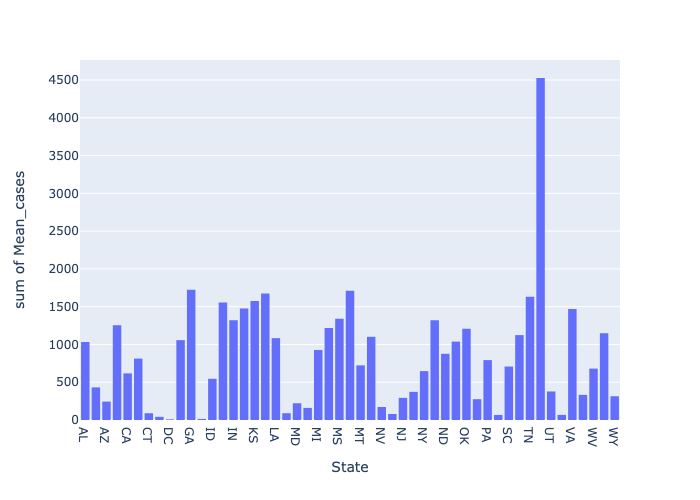

In [17]:
fig_mean=px.histogram(all_states,x='State',y="Mean_cases")
#fig.write_image("images/fig1.png")
fig_mean.show('png')

Plot for median of cases for each state using histogram

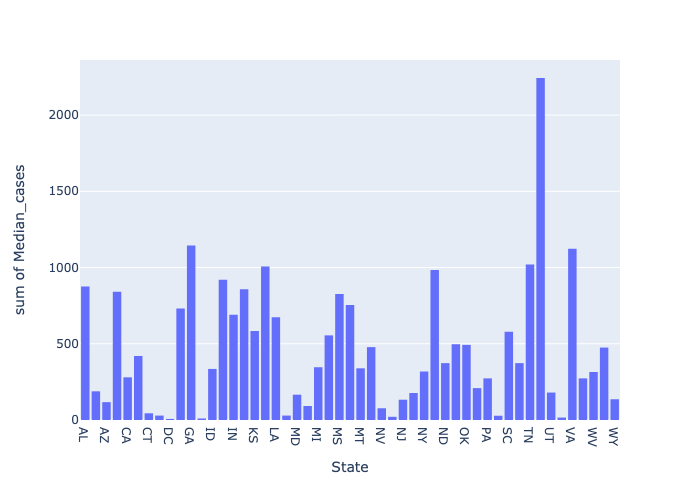

In [18]:
fig_median=px.histogram(all_states,x='State',y="Median_cases")
fig_median.show('png')

In [19]:
all_states

,State,Mean_cases,Median_cases,Mode_cases,Mean_deaths,Median_deaths,Mode_deaths
0,AL,1032.204819,876.0,0 0.0 dtype: float64,23.843373,16.0,0 0.0 dtype: float64
1,AK,431.662651,188.0,0 0.0 dtype: float64,2.325301,0.0,0 0.0 dtype: float64
2,AZ,243.542169,117.0,0 0.0 dtype: float64,5.951807,3.0,0 2.0 dtype: float64
3,AR,1253.867470,841.0,0 0.0 dtype: float64,23.301205,12.0,0 0.0 dtype: float64
4,CA,617.204819,280.0,0 0.0 dtype: float64,8.397590,5.0,0 4.0 dtype: float64
5,CO,812.891566,420.0,0 0.0 dtype: float64,11.686747,6.0,0 0.0 dtype: float64
6,CT,89.493976,44.0,0 0.0 dtype: float64,1.903614,1.0,0 0.0 dtype: float64
7,DE,41.771084,29.0,0 0.0 dtype: float64,0.686747,0.0,0 0.0 dtype: float64
8,DC,8.975904,7.0,0 0.0 1 5.0 dtype: float64,0.096386,0.0,0 0.0 dtype: float64
9,FL,1056.807229,731.0,0 0.0 dtype: float64,16.469880,13.0,0 0.0 dtype: float64


Counties with high case and death rates
    

In [20]:
rates_texas=final[final['State']=='TX']

Normalizing by population

In [21]:
rates_texas['Cases_normalized']=round((rates_texas['Cases']/rates_texas['population'])*10000,3)
rates_texas['Deaths_normalized']=round((rates_texas['Deaths']/rates_texas['population'])*10000,3)
rates_texas=rates_texas.groupby(['countyFIPS','County Name','population']).sum().reset_index()
rates_texas
high_cases=rates_texas
high_death=rates_texas

<ipython-input-21-0bebab81d13d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-0bebab81d13d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



High Case rate

In [22]:
high_cases.sort_values(by=['Cases_normalized'],inplace=True,ascending=False)

In [23]:
top_5_cases=high_cases.head()

In [24]:
top_5_cases

,countyFIPS,County Name,population,StateFIPS,Deaths,Cases,Cases_normalized,Deaths_normalized
94,48189,Hale County,33406,27504,45494,1826284,546693.403,13618.500
161,48323,Maverick County,58722,27504,93901,2988354,508898.542,15990.790
37,48075,Childress County,7306,27504,3765,368124,503865.305,5153.378
63,48127,Dimmit County,10124,27504,7719,498023,491923.183,7624.464
52,48105,Crockett County,3464,27504,4352,164657,475337.763,12563.625


Death rates

In [25]:
high_death.sort_values(by=['Deaths_normalized'],inplace=True,ascending=False)

In [26]:
top_5_deaths=high_death.head()

In [27]:
top_5_deaths

,countyFIPS,County Name,population,StateFIPS,Deaths,Cases,Cases_normalized,Deaths_normalized
77,48155,Foard County,1155,27504,2193,29710,257229.419,18986.994
139,48279,Lamb County,12893,27504,22986,600711,465920.272,17828.287
130,48261,Kenedy County,404,27504,713,9756,241485.156,17648.505
161,48323,Maverick County,58722,27504,93901,2988354,508898.542,15990.790
23,48047,Brooks County,7093,27504,10988,233293,328905.966,15491.277


Plot daily trends of Texas

In [29]:
cases_texas_s=cases_texas
cases_texas=cases_texas.groupby(['Date']).sum().reset_index()
cases_texas




,Date,countyFIPS,StateFIPS,population,Deaths,Cases,new cases,new deaths
0,2020-01-23,12256516,12192,28995881,0,0,0.0,0.0
1,2020-01-24,12256516,12192,28995881,0,0,0.0,0.0
2,2020-01-25,12256516,12192,28995881,0,0,0.0,0.0
3,2020-01-26,12256516,12192,28995881,0,0,0.0,0.0
4,2020-01-27,12256516,12192,28995881,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
567,2021-08-12,12256516,12192,28995881,52768,3278469,15206.0,122.0
568,2021-08-13,12256516,12192,28995881,52912,3292180,13728.0,144.0
569,2021-08-14,12256516,12192,28995881,53029,3318801,26630.0,118.0
570,2021-08-15,12256516,12192,28995881,53072,3323973,5173.0,45.0


In [30]:
cases_texas['Cases_normalized']=round((cases_texas['new cases']/cases_texas['population'])*10000,3)
cases_texas['Deaths_normalized']=round((cases_texas['new deaths']/cases_texas['population'])*10000,3)
cases_texas['log_Cases_normalized']=np.log(cases_texas['Cases_normalized'])
cases_texas['log_Deaths_normalized']=np.log(cases_texas['Deaths_normalized'])

/Users/chandu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



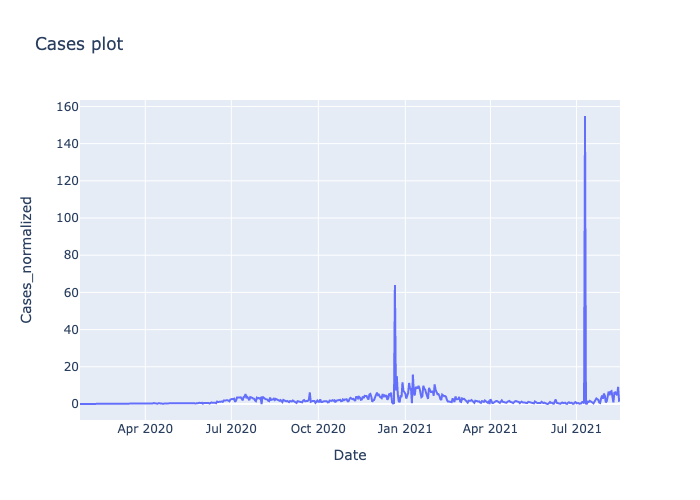

In [31]:
cases_plot = px.line(cases_texas, x ='Date', y='Cases_normalized',title='Cases plot')
cases_plot.show('png')

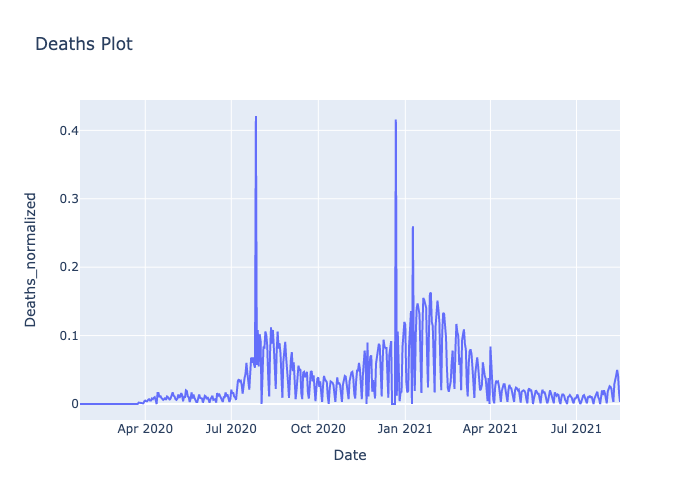

In [32]:
Deaths_plot = px.line(cases_texas, x ='Date', y='Deaths_normalized',title="Deaths Plot")
Deaths_plot.show('png')

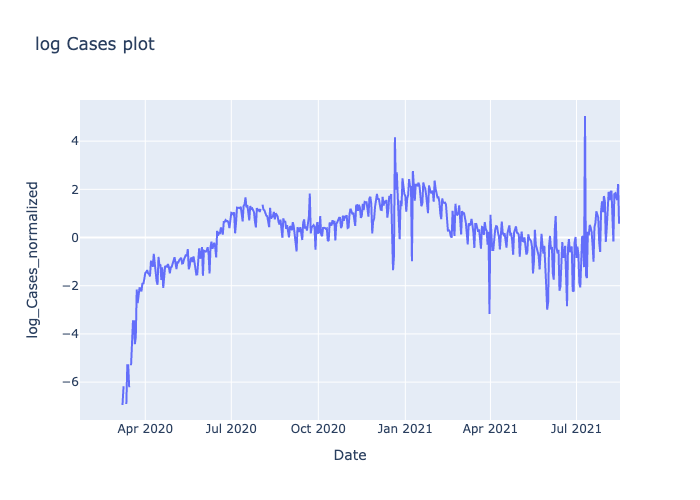

In [33]:
log_cases_plot = px.line(cases_texas, x ='Date', y='log_Cases_normalized',title='log Cases plot')
log_cases_plot.show('png')

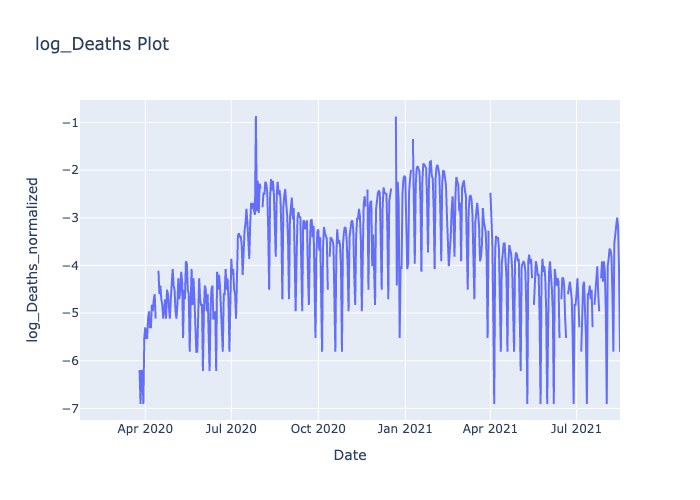

In [34]:
log_Deaths_plot = px.line(cases_texas, x ='Date', y='log_Deaths_normalized',title="log_Deaths Plot")
log_Deaths_plot.show('png')

Top 5 Counties

In [35]:
cases_texas_high=cases_texas_s[cases_texas_s['countyFIPS'].isin([48189,48323, 48075, 48127,48105])]

deaths_texas_high=cases_texas_s[cases_texas_s['countyFIPS'].isin([48155,48279,48261,48323,48047])]


In [36]:
cases_texas_high['Cases_normalized']=round((cases_texas_high['new cases']/cases_texas_high['population'])*10000,3)
cases_texas_high['Deaths_normalized']=round((cases_texas_high['new deaths']/cases_texas_high['population'])*10000,3)
cases_texas_high['log_Cases_normalized']=np.log(cases_texas_high['Cases_normalized'])
cases_texas_high['log_Deaths_normalized']=np.log(cases_texas_high['Deaths_normalized'])

<ipython-input-36-5030c757dafe>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-5030c757dafe>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-5030c757dafe>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-5030c75

Top 5 counties with high case rates

In [37]:
cases_texas_high

,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new cases,new deaths,Cases_normalized,Deaths_normalized,log_Cases_normalized,log_Deaths_normalized
1466881,2020-01-23,48075,TX,Childress County,48,7306,0,0,0.0,0.0,0.000,0.0,-inf,-inf
1466882,2020-01-24,48075,TX,Childress County,48,7306,0,0,0.0,0.0,0.000,0.0,-inf,-inf
1466883,2020-01-25,48075,TX,Childress County,48,7306,0,0,0.0,0.0,0.000,0.0,-inf,-inf
1466884,2020-01-26,48075,TX,Childress County,48,7306,0,0,0.0,0.0,0.000,0.0,-inf,-inf
1466885,2020-01-27,48075,TX,Childress County,48,7306,0,0,0.0,0.0,0.000,0.0,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538500,2021-08-12,48323,TX,Maverick County,48,58722,366,11459,0.0,0.0,0.000,0.0,-inf,-inf
1538501,2021-08-13,48323,TX,Maverick County,48,58722,366,11529,70.0,0.0,11.921,0.0,2.478302,-inf
1538502,2021-08-14,48323,TX,Maverick County,48,58722,366,11536,7.0,0.0,1.192,0.0,0.175633,-inf
1538503,2021-08-15,48323,TX,Maverick County,48,58722,366,11536,0.0,0.0,0.000,0.0,-inf,-inf


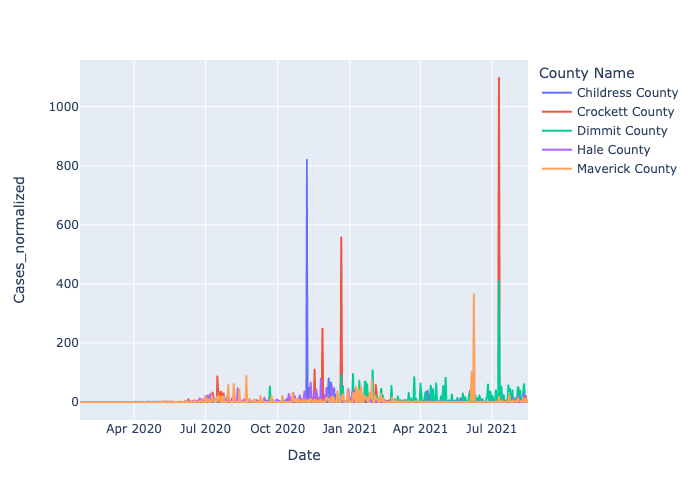

In [38]:
top5_cases_plot = px.line(cases_texas_high, x ='Date', y='Cases_normalized',color='County Name')
top5_cases_plot.show('png')

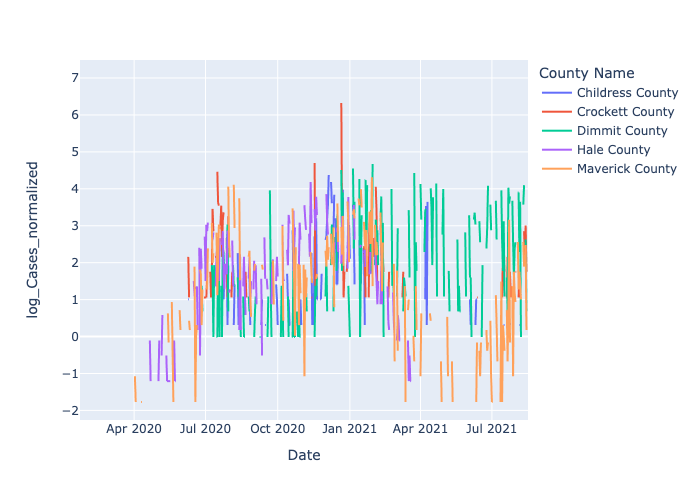

In [39]:
top5_log_cases_plot = px.line(cases_texas_high, x ='Date', y='log_Cases_normalized',color='County Name')
top5_log_cases_plot.show('png')

Top 5 counties with highest death rates

In [40]:
deaths_texas_high

,Date,countyFIPS,State,County Name,StateFIPS,population,Deaths,Cases,new cases,new deaths
1458859,2020-01-23,48047,TX,Brooks County,48,7093,0,0,0.0,0.0
1458860,2020-01-24,48047,TX,Brooks County,48,7093,0,0,0.0,0.0
1458861,2020-01-25,48047,TX,Brooks County,48,7093,0,0,0.0,0.0
1458862,2020-01-26,48047,TX,Brooks County,48,7093,0,0,0.0,0.0
1458863,2020-01-27,48047,TX,Brooks County,48,7093,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1538500,2021-08-12,48323,TX,Maverick County,48,58722,366,11459,0.0,0.0
1538501,2021-08-13,48323,TX,Maverick County,48,58722,366,11529,70.0,0.0
1538502,2021-08-14,48323,TX,Maverick County,48,58722,366,11536,7.0,0.0
1538503,2021-08-15,48323,TX,Maverick County,48,58722,366,11536,0.0,0.0


In [41]:
deaths_texas_high['Cases_normalized']=round((deaths_texas_high['new cases']/deaths_texas_high['population'])*10000,3)
deaths_texas_high['Deaths_normalized']=round((deaths_texas_high['new deaths']/deaths_texas_high['population'])*10000,3)
deaths_texas_high['log_Cases_normalized']=np.log(deaths_texas_high['Cases_normalized'])
deaths_texas_high['log_Deaths_normalized']=np.log(deaths_texas_high['Deaths_normalized'])

<ipython-input-41-c7bccd97a90f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-c7bccd97a90f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chandu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

<ipython-input-41-c7bccd97a90f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

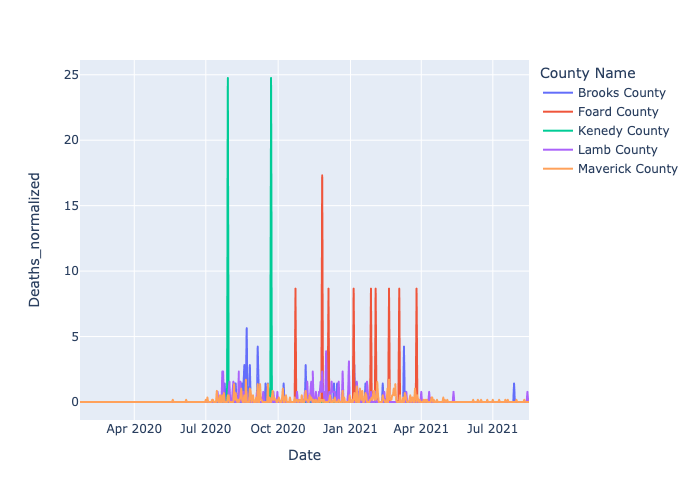

In [42]:
Top5_Deaths_plot = px.line(deaths_texas_high, x ='Date', y='Deaths_normalized',color='County Name')
Top5_Deaths_plot.show('png')

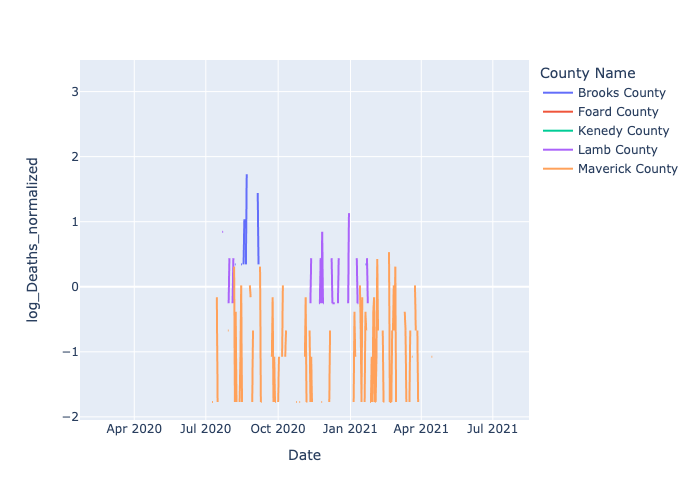

In [43]:
Top5_log_Deaths_plot = px.line(deaths_texas_high, x ='Date', y='log_Deaths_normalized',color='County Name')
Top5_log_Deaths_plot.show('png')